In [1]:
## general imports
import json
import numpy as np
import sys

## COCO imports
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
from pycocotools.cocoanalyze import COCOanalyze

## plotting imports
%matplotlib inline
import matplotlib.pyplot as plt
import skimage.io as io

In [2]:
## set paths
#dataDir  = '.'
#dataType = 'val2014'
#annType  = 'person_keypoints'
#teamName = 'fakekeypoints100'

#annFile  = '%s/annotations/%s_%s.json'%(dataDir, annType, dataType)
#resFile  = '%s/detections/%s_%s_%s_results.json'%(dataDir, teamName, annType, dataType)
annFile  = '../../data/mscoco2017/annotations/person_keypoints_val2017.json'
resFile  = 'vis_val2017_90000_vgginit_368_432/json_detection.json'
print("{:10}[{}]".format('annFile:',annFile))
print("{:10}[{}]".format('resFile:',resFile))

# with open(annFile) as f:
#     gt_data = json.load(f)

# imgs_info = {i['id']:{'id':i['id'] ,
#                       'width':i['width'],
#                       'height':i['height']}
#                        for i in gt_data['images']}

annFile:  [../../data/mscoco2017/annotations/person_keypoints_val2017.json]
resFile:  [vis_val2017_90000_vgginit_368_432/json_detection.json]


In [3]:
# with open(resFile) as f:
#     team_dts = json.load(f)

# team_dts = [d for d in team_dts if d['image_id'] in imgs_info]

# team_img_ids = set([d['image_id'] for d in team_dts])
# print("Loaded [{}] instances in [{}] images.".format(len(team_dts),len(imgs_info)))

## load ground truth annotations
coco_gt = COCO(annFile)
catIds = coco_gt.getCatIds(catNms=['person'])
keys = coco_gt.getImgIds(catIds=catIds)
print('Person images: ', len(keys))

## initialize COCO detections api
coco_dt   = coco_gt.loadRes(resFile)

## initialize COCO eval api
cocoEval = COCOeval(coco_gt, coco_dt, 'keypoints')
cocoEval.params.imgIds = keys
cocoEval.evaluate()
cocoEval.accumulate()
cocoEval.summarize()
# if teamName == 'fakekeypoints100':
#     imgIds  = sorted(coco_gt.getImgIds())[0:100]
#     coco_analyze.cocoEval.params.imgIds = imgIds

loading annotations into memory...
Done (t=0.31s)
creating index...
index created!
Person images:  2693
Loading and preparing results...
DONE (t=0.31s)
creating index...
index created!
<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=3.76s).
<mrr:2.0>Accumulating evaluation results...
<mrr:2.0>DONE (t=0.07s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.324
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] = 0.605
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] = 0.303
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] = 0.276
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] = 0.392
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.372
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] = 0.632
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] = 

<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=3.67s).
<mrr:2.0>Accumulating evaluation results...
<mrr:2.0>DONE (t=0.18s).
<mrr:2.0>Verbose Summary:
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] = 0.605
 Average Precision  (AP) @[ IoU=0.55      | area=   all | maxDets= 20 ] = 0.559
 Average Precision  (AP) @[ IoU=0.60      | area=   all | maxDets= 20 ] = 0.503
 Average Precision  (AP) @[ IoU=0.65      | area=   all | maxDets= 20 ] = 0.448
 Average Precision  (AP) @[ IoU=0.70      | area=   all | maxDets= 20 ] = 0.380
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] = 0.303
 Average Precision  (AP) @[ IoU=0.80      | area=   all | maxDets= 20 ] = 0.216
 Average Precision  (AP) @[ IoU=0.85      | area=   all | maxDets= 20 ] = 0.138
 Average Precision  (AP) @[ IoU=0.90      | area=   all | maxDets= 20 ] = 0.072
 Average Precision  (AP) @[ IoU=0.95      | area=   all | maxDets= 20 ] =

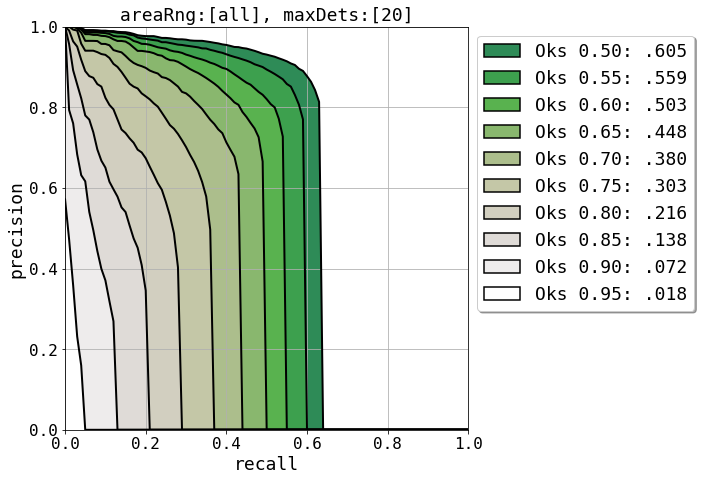

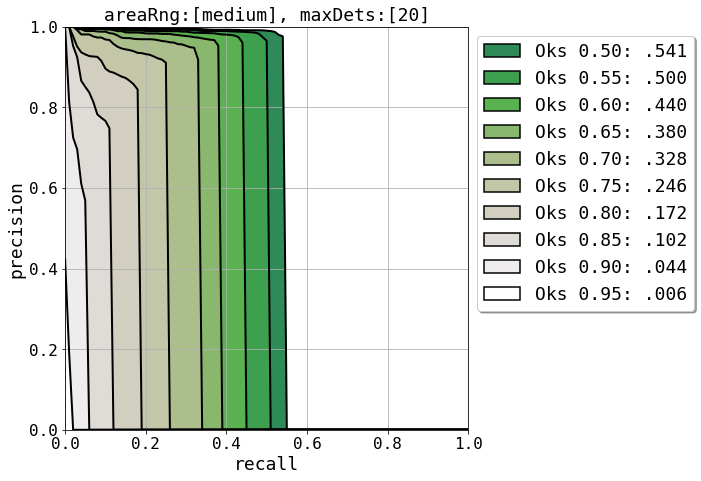

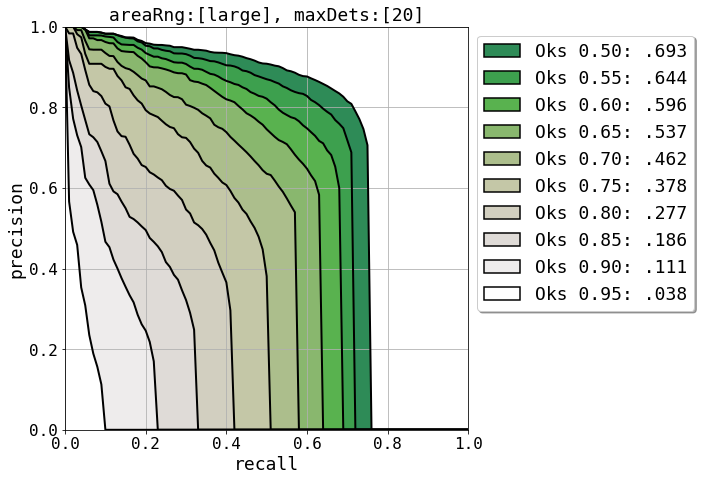

In [4]:
# use evaluate() method for standard coco evaluation
# input arguments:
#  - verbose   : verbose outputs    (default: False)
#  - makeplots : plots eval results (default: False)
#  - savedir   : path to savedir    (default: None)
#  - team_name : team name string   (default: None)

## initialize COCO analyze api
coco_analyze = COCOanalyze(coco_gt, coco_dt, 'keypoints')
coco_analyze.evaluate(verbose=True, makeplots=True)

In [5]:
## NOTE: the values below are all default

# set OKS threshold of the extended error analysis
coco_analyze.params.oksThrs       = [.5,.55,.6,.65,.7,.75,.8,.85,.9,.95]

# set OKS threshold required to match a detection to a ground truth
coco_analyze.params.oksLocThrs    = .1

# set KS threshold limits defining jitter errors
coco_analyze.params.jitterKsThrs = [.5,.85]

# set the localization errors to analyze and in what order
# note: different order will show different progressive improvement
# to study impact of single error type, study in isolation
coco_analyze.params.err_types = ['miss','swap','inversion','jitter']

# area ranges for evaluation
# 'all' range is union of medium and large
coco_analyze.params.areaRng       = [[32 ** 2, 1e5 ** 2]] #[96 ** 2, 1e5 ** 2],[32 ** 2, 96 ** 2]
coco_analyze.params.areaRngLbl    = ['all'] # 'large','medium' 

coco_analyze.params.maxDets = [20]

In [6]:
# use analyze() method for advanced error analysis 
# input arguments:
#  - check_kpts   : analyze keypoint localization errors for detections with a match (default: True)
#                 : default errors types are ['jitter','inversion','swap','miss']
#  - check_scores : analyze optimal score (maximizing oks over all matches) for every detection (default: True)
#  - check_bkgd   : analyze background false positives and false negatives (default: True)

coco_analyze.analyze(check_kpts=True, check_scores=True, check_bckgd=True)

Analyzing keypoint errors...
<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=2.48s).
DONE (t=7.11s).
Analyzing detection scores...
<mrr:2.0>Running per image *optimal score* evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=2.41s).
DONE (t=3.56s).
Analyzing background false positives and false negatives...
<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=2.62s).
DONE (t=3.52s).


<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=2.64s).
<mrr:2.0>Accumulating evaluation results...
<mrr:2.0>DONE (t=0.03s).
Correcting area range [all]:
Correcting error type [miss]:
<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=2.65s).
<mrr:2.0>Accumulating evaluation results...
<mrr:2.0>DONE (t=0.03s).
Correcting error type [swap]:
<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=2.85s).
<mrr:2.0>Accumulating evaluation results...
<mrr:2.0>DONE (t=0.03s).
Correcting error type [inversion]:
<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=2.62s).
<mrr:2.0>Accumulating evaluation results...
<mrr:2.0>DONE (t=0.03s).
Correcting error type [jitter]:
<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=2.61s).
<mrr:2.0

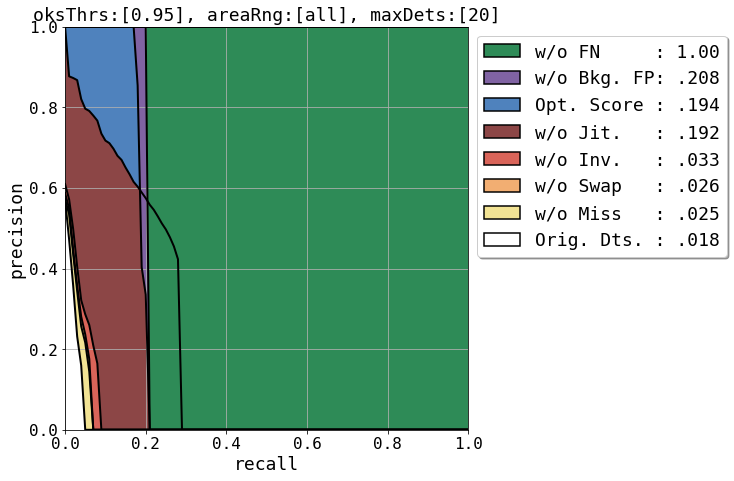

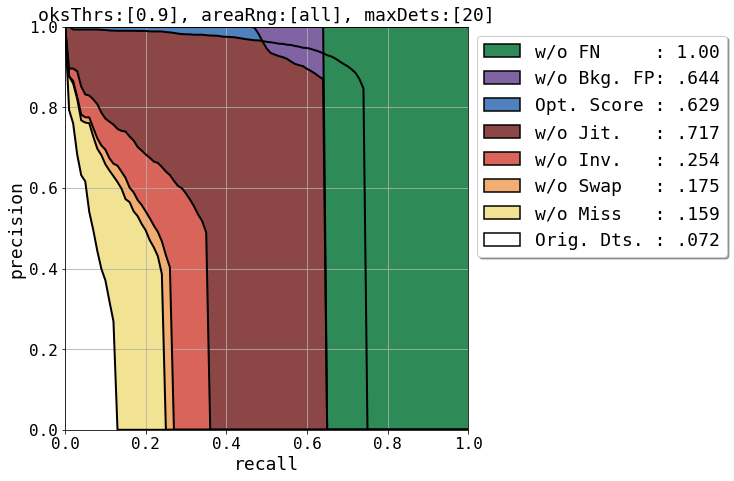

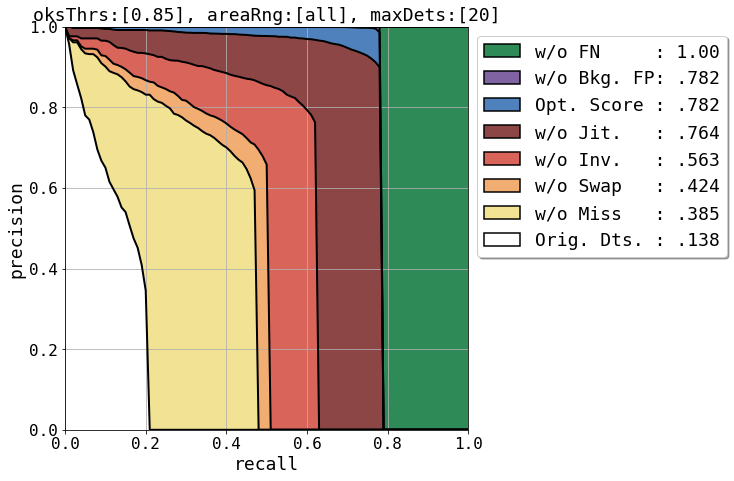

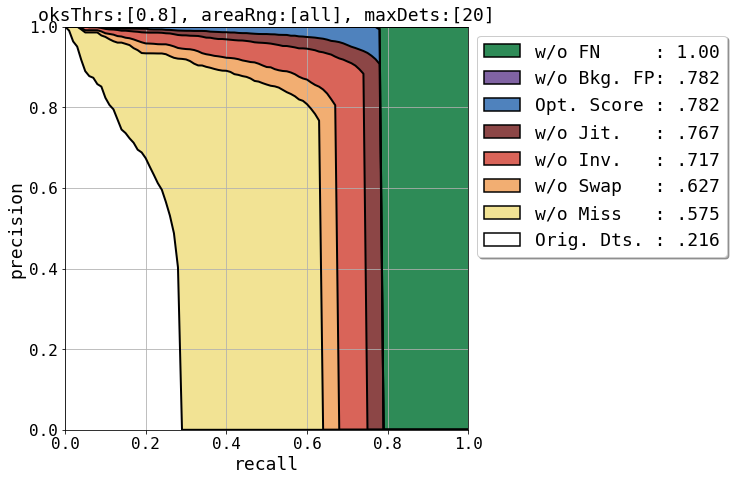

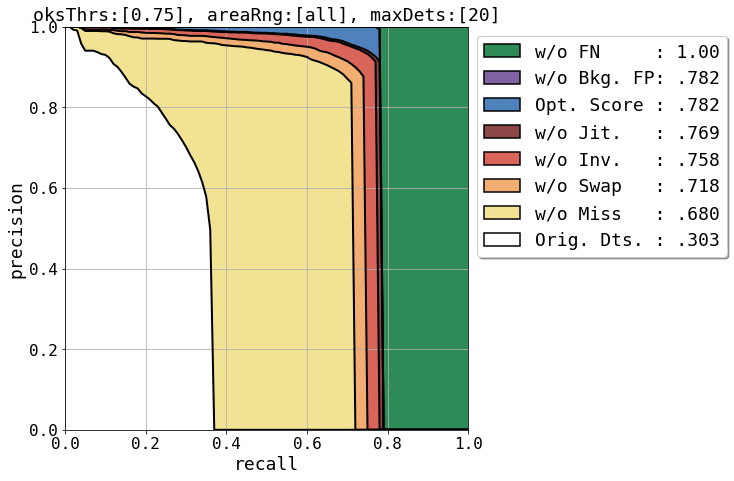

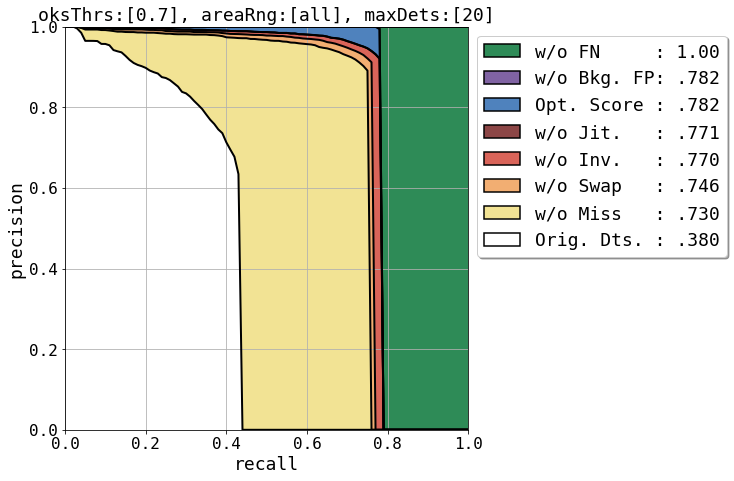

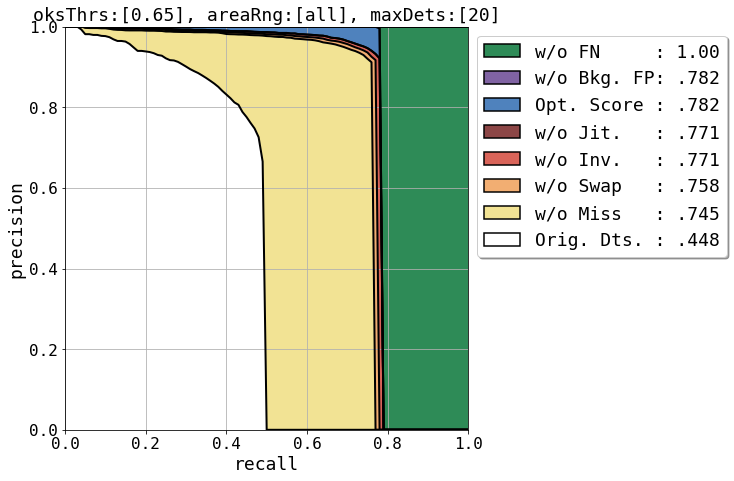

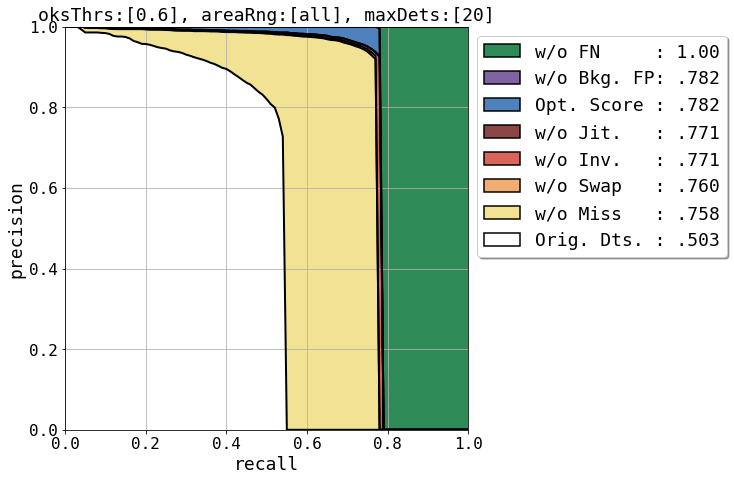

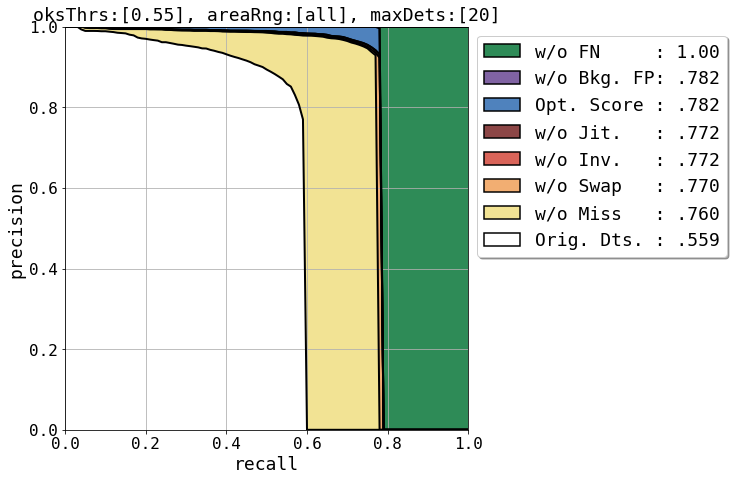

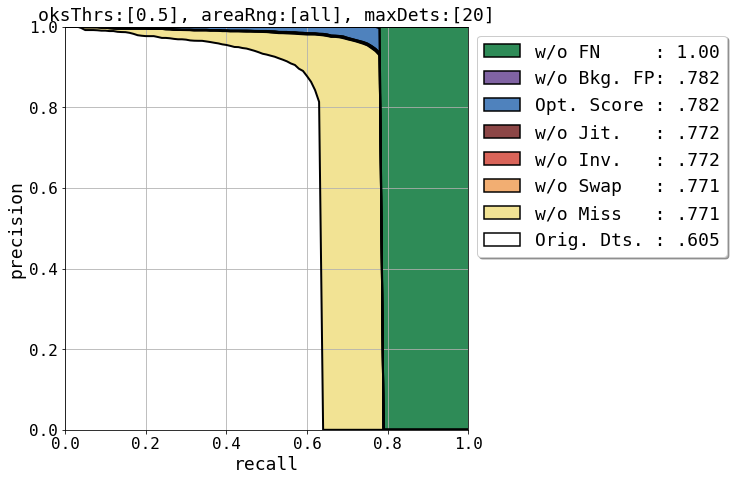

In [7]:
# use summarize() method to get the results after progressive correction of errors
# input arguments:
#  - makeplots : plots eval results (default: False)
#  - savedir   : path to savedir    (default: None)
#  - team_name : team name string   (default: None)

coco_analyze.summarize(makeplots=True)

In [8]:
## print the performance summary 
for stat in coco_analyze.stats: print(stat)

{'auc': 0.017754563565992976, 'recall': 0.048173803526448365, 'err': 'baseline', 'oks': 0.95, 'maxDets': 20, 'areaRngLbl': 'all'}
{'auc': 0.07248324327219939, 'recall': 0.12736146095717885, 'err': 'baseline', 'oks': 0.9, 'maxDets': 20, 'areaRngLbl': 'all'}
{'auc': 0.13758503514476536, 'recall': 0.20481738035264482, 'err': 'baseline', 'oks': 0.85, 'maxDets': 20, 'areaRngLbl': 'all'}
{'auc': 0.2159834726155262, 'recall': 0.28101385390428213, 'err': 'baseline', 'oks': 0.8, 'maxDets': 20, 'areaRngLbl': 'all'}
{'auc': 0.3028654367640668, 'recall': 0.36067380352644834, 'err': 'baseline', 'oks': 0.75, 'maxDets': 20, 'areaRngLbl': 'all'}
{'auc': 0.38013281641030583, 'recall': 0.43545340050377834, 'err': 'baseline', 'oks': 0.7, 'maxDets': 20, 'areaRngLbl': 'all'}
{'auc': 0.4475110823025508, 'recall': 0.49149874055415615, 'err': 'baseline', 'oks': 0.65, 'maxDets': 20, 'areaRngLbl': 'all'}
{'auc': 0.5031628104709802, 'recall': 0.5429785894206549, 'err': 'baseline', 'oks': 0.6, 'maxDets': 20, 'are

In [9]:
## after analyze() has been called the following variables are available

# list of the corrected detections
corrected_dts = coco_analyze.corrected_dts['all']

i = 17
# info on keypoint detection localization error
print('good: %s'%corrected_dts[i]['good'])
print('miss: %s'%corrected_dts[i]['miss'])
print('swap: %s'%corrected_dts[i]['swap'])
print('inv.: %s'%corrected_dts[i]['inversion'])
print('jit.: %s\n'%corrected_dts[i]['jitter'])

# corrected keypoint locations
print('predicted keypoints:\n %s'%corrected_dts[i]['keypoints'])
print('corrected keypoints:\n %s\n'%corrected_dts[i]['opt_keypoints'])

# optimal detection score
print('original score: %s'%corrected_dts[i]['score'])
print('optimal score:  %s\n'%corrected_dts[i]['opt_score'])

good: [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1]
miss: [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0]
swap: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
inv.: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0]
jit.: [1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

predicted keypoints:
 [348, 183, 2, 350, 180, 2, 345, 180, 2, 353, 183, 2, 342, 183, 2, 360, 190, 2, 347, 192, 2, 367, 192, 2, 345, 200, 2, 366, 189, 2, 351, 191, 2, 364, 218, 2, 356, 218, 2, 359, 237, 2, 350, 238, 2, 384, 252, 2, 379, 255, 2]
corrected keypoints:
 [346.7570345280191, 183, 2, 348.727917815403, 181, 2, 344.727917815403, 182, 2, 353.0, 183, 2, 342.0, 183, 2, 359.3002202966734, 186, 2, 347.0, 192, 2, 379.03112887414926, 205, 2, 363.32947853115814, 191, 2, 379.7281620684973, 192, 2, 376.7281620684973, 184, 2, 364.0, 218, 2, 356.0, 218, 2, 351.23145322514944, 238, 2, 360.0, 248, 2, 339.90512483795334, 261, 2, 379.0, 255, 2]

original score: 1.1316943168640137
optimal score:  0.91502772490

In [10]:
## after summarize() has been called the following variables are available

# list of the false positive detections and missed ground-truth annotations
false_pos_dts = coco_analyze.false_pos_dts
false_neg_gts = coco_analyze.false_neg_gts
for oks in coco_analyze.params.oksThrs:
    print("Oks:[%.2f] - Num.FP:[%d] - Num.FN:[%d]"%(oks,len(false_pos_dts['all',str(oks)]),len(false_neg_gts['all',str(oks)])))

Oks:[0.50] - Num.FP:[540] - Num.FN:[5572]
Oks:[0.55] - Num.FP:[567] - Num.FN:[5594]
Oks:[0.60] - Num.FP:[598] - Num.FN:[5617]
Oks:[0.65] - Num.FP:[627] - Num.FN:[5642]
Oks:[0.70] - Num.FP:[630] - Num.FN:[5645]
Oks:[0.75] - Num.FP:[675] - Num.FN:[5689]
Oks:[0.80] - Num.FP:[717] - Num.FN:[5726]
Oks:[0.85] - Num.FP:[784] - Num.FN:[5795]
Oks:[0.90] - Num.FP:[1465] - Num.FN:[6646]
Oks:[0.95] - Num.FP:[3905] - Num.FN:[9482]
